<a href="https://colab.research.google.com/github/MiEmily/DS-Project/blob/main/Content_filtering_Rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",None)
pd.set_option("display.max_colwidth",None)
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# clean data

In [2]:
#get the new data
#clean dataset
df=pd.read_csv('/content/drive/MyDrive/Preprocessed_data.csv')
def clean_Preprocessed(df):
  #lower all the column name
  df.columns=[col.lower() for col in df.columns]
  #remove non invalid ascii character rows
  df = df[df.applymap(lambda x: x is None or all(ord(c) < 128 for c in str(x))).all(axis=1)]
  df=df.drop(index=df[df['category']=='9'].index)
  df=df.drop(index=df[df['book_title']=='253'].index)
  #remove the category punctuation
  # df['category']=df['category'].str.replace(r'[^\w\s]+', '')
  #remove the leading or trailing white space in book_title
  # df['book_title'] = df['book_title'].apply(lambda x: x.strip())
  #remove the unnamed columun
  df=df.loc[:, ~df.columns.str.contains('^Unnamed')]

  #reset_index
  df.index=pd.RangeIndex(start=1,stop=1+len(df),step=1)
  return df
df=clean_Preprocessed(df)
#input.to_csv('/content/drive/MyDrive/data.csv')

In [3]:
len(df)


598656

In [4]:
df1=df.copy()

In [5]:
df2=df.copy()

In [ ]:
df1.head(5)

In [7]:
df2=df2[['user_id','book_title', 'year_of_publication', 'book_author', 'publisher', 'language', 'summary', 'category','rating']]
df2.head(5)

,user_id,book_title,year_of_publication,book_author,publisher,language,summary,category,rating
1,2,Classical Mythology,2002.0,Mark P. O. Morford,Oxford University Press,en,"Provides an introduction to classical myths placing the addressed\ntopics within their historical context, discussion of archaeological\nevidence as support for mythical events, and how these themes have\nbeen portrayed in literature, art, ...",['Social Science'],0
2,8,Clara Callan,2001.0,Richard Bruce Wright,HarperFlamingo Canada,en,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",['Actresses'],5
3,11400,Clara Callan,2001.0,Richard Bruce Wright,HarperFlamingo Canada,en,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",['Actresses'],0
4,11676,Clara Callan,2001.0,Richard Bruce Wright,HarperFlamingo Canada,en,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",['Actresses'],8
5,41385,Clara Callan,2001.0,Richard Bruce Wright,HarperFlamingo Canada,en,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",['Actresses'],0


#data visualization

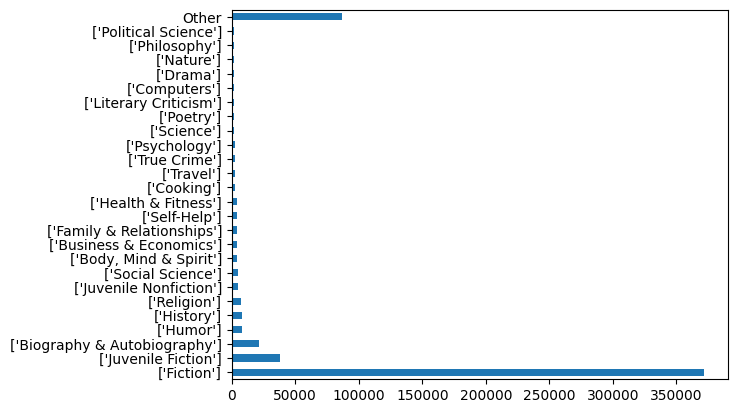

<Figure size 1000x800 with 0 Axes>

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the value counts and sort them in descending order
category_counts = df2['category'].value_counts().sort_values(ascending=False)

# Choose a threshold for the number of top categories to display
top_n_categories = 25

# Select the top N categories and sum the rest into 'Other'
top_categories = category_counts[:top_n_categories]
top_categories['Other'] = category_counts[top_n_categories:].sum()

# Plot a horizontal bar chart
top_categories.plot(kind='barh')

# Optionally, you can set the figure size to make the plot larger
plt.figure(figsize=(10, 8))

plt.show()


# filter data[data reduction ]

In [68]:
# #get the new date-- use for BERT
# def process_input(df):
#   #df_rate=df[['user_id','rating','book_title', 'year_of_publication','book_author','publisher', 'language', 'summary', 'category']]
#   df=df.drop_duplicates(subset=['book_title'])
#   df = df[['book_title', 'year_of_publication','book_author','publisher', 'language', 'summary', 'category']]

#   #reduce high cardinality of categorical variable.we need>10k data, so trunctuate
#   valid_categories=df['category'].value_counts()[0:250].index.tolist()
#   valid_authors=df['book_author'].value_counts()[0:250].index.tolist()
#   valid_publishers=df['publisher'].value_counts()[0:250].index.tolist()

#   df = df[(df['category'].isin(valid_categories)) & (df['book_author'].isin(valid_authors)) & (df['publisher'].isin(valid_publishers))]

#   return df
# input_book=process_input(df)
# #input.to_csv('/content/drive/MyDrive/input1_data.csv')

In [ ]:
# len(input_book)

In [112]:
# valid_categories1=df1['category'].value_counts()[0:250].index.tolist()
# valid_authors1=df1['book_author'].value_counts()[0:300].index.tolist()
# valid_publishers1=df1['publisher'].value_counts()[0:250].index.tolist()

In [113]:
# df1 = df1[(df1['category'].isin(valid_categories1)) & (df['book_author'].isin(valid_authors1)) & (df['publisher'].isin(valid_publishers1))]
# len(df1)

194433

In [37]:
#get the new date-- use for BERT
def process_input(df):
  #df_rate=df[['user_id','rating','book_title', 'year_of_publication','book_author','publisher', 'language', 'summary', 'category']]
  # df=df.drop_duplicates(subset=['book_title'])
  # df = df[['user_id','book_title', 'year_of_publication', 'book_author', 'publisher', 'language', 'summary', 'category','rating']]

  #reduce high cardinality of categorical variable.filter out the have over 150 records for the column
  categories_gt150 = df2['category'].value_counts()[df2['category'].value_counts() > 150].index.tolist()
  authors_gt150 = df2['book_author'].value_counts()[df2['book_author'].value_counts() > 150].index.tolist()
  publishers_gt150 = df2['publisher'].value_counts()[df2['publisher'].value_counts() > 150].index.tolist()
  df = df[(df['category'].isin( categories_gt150)) & (df['book_author'].isin(authors_gt150)) & (df['publisher'].isin(publishers_gt150))]

  return df
filtered_books=process_input(df2)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598656 entries, 1 to 598656
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              598656 non-null  int64  
 1   book_title           598656 non-null  object 
 2   year_of_publication  598656 non-null  float64
 3   book_author          598656 non-null  object 
 4   publisher            598656 non-null  object 
 5   language             598656 non-null  object 
 6   summary              598656 non-null  object 
 7   category             598656 non-null  object 
 8   rating               598656 non-null  int64  
 9   combined_features    598656 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 45.7+ MB


# create groud truth

In [ ]:
# Assuming 'book_title' is the unique identifier for each book
# Calculate average ratings for each book
df2_filtered = df2[df2['rating'] > 0]
average_ratings = df2_filtered.groupby('book_title')['rating'].mean()

# Remove duplicate books based on 'book_title'
unique_books = df2.drop_duplicates(subset=['book_title'])

# Merge the average ratings back with the book metadata
unique_books = unique_books.merge(average_ratings, on='book_title', how='left')
unique_books=unique_books.drop(columns=['user_id','rating_x'])
# Now, 'unique_books' contains unique books with their average ratings


In [ ]:
unique_books.head(100)

In [12]:
def get_average(input_rate):
    books = input_rate['book_title'].unique()
    book_average = pd.DataFrame(columns=['book_title', 'ave_rate', 'category'])

    for book in books:
        book_data = input_rate[(input_rate['book_title'] == book) & (input_rate['rating'] > 0)]

        # Check if book_data is not empty
        if not book_data.empty:
            ave_rate = round(book_data['rating'].mean(), 1)
            category = book_data['category'].iloc[0]  # Safe to use iloc since we know the DataFrame is not empty

            temp_df = pd.DataFrame({
                'book_title': [book],
                'ave_rate': [ave_rate],
                'category': [category]
            })

            book_average = pd.concat([book_average, temp_df], ignore_index=True)

    return book_average

# Replace 'df2' with your actual DataFrame variable name
# Make sure that 'df2' is loaded and has the 'book_title', 'rating', and 'category' columns
book_average2 = get_average(filtered_books
                            ).sort_values(by=['ave_rate'], ascending=False)


In [39]:
df2['book_title'].nunique()

123067

In [40]:
len(book_average2)

8881

In [41]:
#combine-bert
def combine_features(row):
  return row['book_title']+'  '+row['summary']

df2['combined_features']=df2.apply(combine_features,axis=1)


In [16]:
pip install -U sentence-transformers


  Using cached huggingface_hub-0.19.4-py3-none-any.whl (311 kB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.2.1
    Uninstalling huggingface-hub-0.2.1:
      Successfully uninstalled huggingface-hub-0.2.1


In [81]:
!pip install huggingface_hub==0.2.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.19.4
    Uninstalling huggingface-hub-0.19.4:
      Successfully uninstalled huggingface-hub-0.19.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 2.2.2 requires huggingface-hub>=0.4.0, but you have huggingface-hub 0.2.1 which is incompatible.
tokenizers 0.15.0 requires huggingface_hub<1.0,>=0.16.4, but you have huggingface-hub 0.2.1 which is incompatible.
transformers 4.35.2 requires huggingface-hub<1.0,>=0.16.4, but you have huggingface-hub 0.2.1 which is incompatible.


In [ ]:
!pip install --upgrade huggingface_hub transformers

In [58]:
len(unique_books)


123067

In [63]:
unique_books_10k=unique_books.iloc[:10000]

In [64]:
#extract summary feature
# from huggingface_hub import get_full_repo_name
from packaging import version
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
#compute the text similarity
sampled_books = unique_books_10k

model=SentenceTransformer('all-MiniLM-L6-v2')
summary_embeddings =model.encode(sampled_books['summary'].tolist())
cs_summary=cosine_similarity(summary_embeddings)

def get_recommendations1(book_title,cosine_sim=cs_summary):
  indices = pd.Series(sampled_books.index,index=unique_books['book_title']).drop_duplicates()
  idx=indices[book_title]
  similarity_scores=sorted(list(enumerate(cosine_sim[idx])),key=lambda x: x[1],reverse=True)
  similarity_scores =  similarity_scores[0:11]
  book_indices=[i[0]for i in similarity_scores]

  return sampled_books[['book_title','category']].iloc[book_indices]

# rec_list_summary1=get_recommendations1('Sanctuary')
rec_list_summary1=get_recommendations1('The Homing')

rec_list_summary1

ValueError: ignored

In [44]:
# Correctly reset the index without using inplace=True
sampled_books = filtered_books.sample(n=10000, random_state=42).reset_index(drop=True)

# The rest of your code remains the same
model = SentenceTransformer('all-MiniLM-L6-v2')
summary_embeddings = model.encode(sampled_books['summary'].tolist())
cs_summary = cosine_similarity(summary_embeddings)

def get_recommendations1(book_title, cosine_sim=cs_summary):
    indices = pd.Series(sampled_books.index, index=sampled_books['book_title']).drop_duplicates()
    idx = indices[book_title]
    similarity_scores = sorted(list(enumerate(cosine_sim[idx])), key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:11]
    book_indices = [i[0] for i in similarity_scores]

    return sampled_books[['book_title', 'category']].iloc[book_indices]

# Test the function
rec_list_summary1 = get_recommendations1('The Homing')
rec_list_summary1


ValueError: ignored

In [45]:
cs_summary

array([[1.0000001 , 0.13381465, 0.2051192 , ..., 0.53022516, 0.22324395,
        0.42116785],
       [0.13381465, 1.        , 0.30565542, ..., 0.17914185, 0.06616758,
        0.19635752],
       [0.2051192 , 0.30565542, 0.99999976, ..., 0.24537207, 0.14703566,
        0.14428364],
       ...,
       [0.53022516, 0.17914185, 0.24537207, ..., 1.        , 0.23267016,
        0.3705383 ],
       [0.22324395, 0.06616758, 0.14703566, ..., 0.23267016, 1.0000001 ,
        0.22478716],
       [0.42116785, 0.19635752, 0.14428364, ..., 0.3705383 , 0.22478716,
        0.9999999 ]], dtype=float32)

In [36]:
# Correctly reset the index
sampled_books = filtered_books.sample(n=10000, random_state=42).reset_index(drop=True)

# Proceed with the rest of your operations
model = SentenceTransformer('all-MiniLM-L6-v2')
summary_embeddings = model.encode(sampled_books['summary'].tolist())
cs_summary = cosine_similarity(summary_embeddings)

def get_recommendations1(book_title, cosine_sim=cs_summary):
    indices = pd.Series(sampled_books.index, index=sampled_books['book_title']).drop_duplicates()
    idx = indices[book_title]
    similarity_scores = sorted(list(enumerate(cosine_sim[idx])), key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:11]
    book_indices = [i[0] for i in similarity_scores]

    return sampled_books[['book_title', 'category']].iloc[book_indices]

# Test the function
rec_list_summary1 = get_recommendations1('The Homing')
rec_list_summary1


ValueError: ignored

In [43]:
def recommend_actual_rate(rec_list):
#recommend_books=get_recommendations('Death in the Clouds')['book_title']
  return book_averate[(book_averate['book_title'].isin(rec_list['book_title']))]


In [60]:
sampled_books = filtered_books.sample(n=10000, random_state=42).reset_index(drop=True)

actual_rate1

NameError: ignored

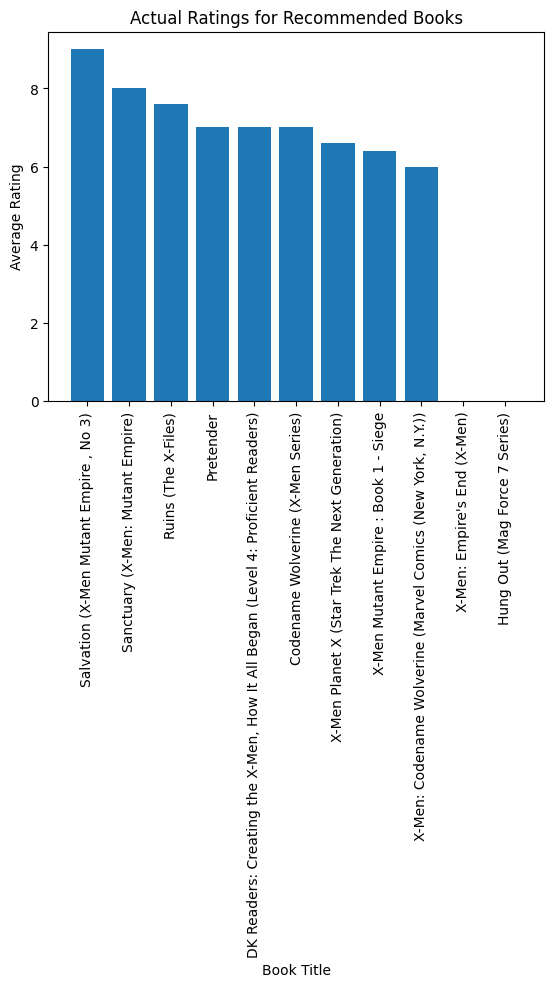

In [ ]:
import matplotlib.pyplot as plt

def visualization(actual_rate):
  # Fill NaN values with 0
  actual_rate = actual_rate.fillna(0)

  # Sort by average rating
  actual_rate = actual_rate.sort_values(by='ave_rate', ascending=False)

  # Create a bar chart
  fig, ax = plt.subplots()
  ax.bar(actual_rate['book_title'], actual_rate['ave_rate'])

  # Set axis labels and title
  ax.set_xlabel('Book Title')
  ax.set_ylabel('Average Rating')
  ax.set_title('Actual Ratings for Recommended Books')

  # Rotate x-axis labels
  plt.xticks(rotation=90)

  # Show the plot
  plt.show()

visualization(actual_rate1)



In [ ]:
#extract book_title features
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
#compute the text similarity
model=SentenceTransformer('all-MiniLM-L6-v2')
title_embeddings =model.encode(input_book['book_title'].tolist())
#title_embeddings.shape()
cs_title=cosine_similarity(title_embeddings)

def get_recommendations(book_title,cosine_sim=cs_title):
  indices = pd.Series(input_book.index,index=input_book['book_title']).drop_duplicates()
  idx=indices[book_title]
  similarity_scores=sorted(list(enumerate(cosine_sim[idx])),key=lambda x: x[1],reverse=True)
  similarity_scores =  similarity_scores[0:11]
  book_indices=[i[0]for i in similarity_scores]

  return input_book[['book_title','category']].iloc[book_indices]

recommend_list2=get_recommendations('Death in the Clouds')
recommend_list2



,book_title,category
381185,Sanctuary (X-Men: Mutant Empire),Fiction
381189,"Salvation (X-Men Mutant Empire , No 3)",Adventure stories
381178,X-Men Mutant Empire : Book 1 - Siege,Fiction
380921,X-Men: Empire's End (X-Men),Fiction
428263,Codename Wolverine (X-Men Series),Fiction
244715,X-Men Planet X (Star Trek The Next Generation),Fiction
484916,The Mutant Season,Fiction
532016,"X-Men: Codename Wolverine (Marvel Comics (New York, N.Y.))",Fiction
125751,Sanctuary,Fiction
554210,Fox and Empire,Fiction


In [ ]:
actual_rate2=recommend_actual_rate(recommend_list2).sort_values(by=['ave_rate'],ascending=False)
actual_rate2

,book_title,ave_rate
3872,"Salvation (X-Men Mutant Empire , No 3)",9.0
616,Sanctuary,8.2
3871,Sanctuary (X-Men: Mutant Empire),8.0
4884,Codename Wolverine (X-Men Series),7.0
1628,X-Men Planet X (Star Trek The Next Generation),6.6
3870,X-Men Mutant Empire : Book 1 - Siege,6.4
7729,"X-Men: Codename Wolverine (Marvel Comics (New York, N.Y.))",6.0
6309,The Mutant Season,5.5
3586,GAME OF EMPIRE,NaN
3852,X-Men: Empire's End (X-Men),NaN


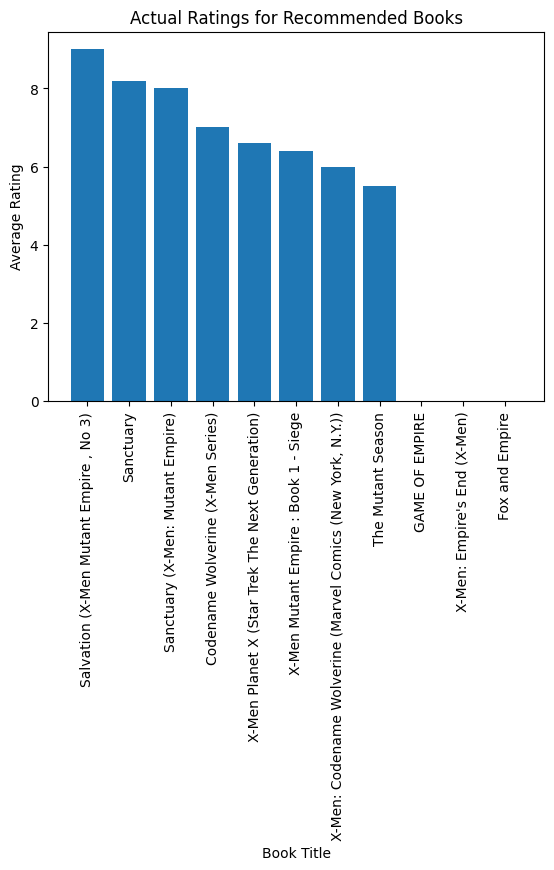

In [ ]:
visualization(actual_rate2)

In [ ]:
#extract BERT combined _features
#cos1

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
def combine_features(row):
  return row['book_title']+'  '+row['summary']

input_book['combined_features']=input_book.apply(combine_features,axis=1)

#compute the text similarity
model=SentenceTransformer('all-MiniLM-L6-v2')
combined_text_embeddings =model.encode(input_book['combined_features'].tolist())
cs_bert_combined=cosine_similarity(combined_text_embeddings)
def get_recommendations(book_title,cosine_sim=cs_bert_combined):
  indices = pd.Series(input_book.index,index=input_book['book_title']).drop_duplicates()

  idx=indices[book_title]
  similarity_scores=sorted(list(enumerate(cosine_sim[idx])),key=lambda x: x[1],reverse=True)
  similarity_scores =  similarity_scores[0:11]
  book_indices=[i[0]for i in similarity_scores]

  return input_book[['book_title','category']].iloc[book_indices]
recommend_list3=get_recommendations('Death in the Clouds')
recommend_list3


,book_title,category
381185,Sanctuary (X-Men: Mutant Empire),Fiction
381178,X-Men Mutant Empire : Book 1 - Siege,Fiction
381189,"Salvation (X-Men Mutant Empire , No 3)",Adventure stories
380921,X-Men: Empire's End (X-Men),Fiction
532016,"X-Men: Codename Wolverine (Marvel Comics (New York, N.Y.))",Fiction
559306,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Juvenile Fiction
244715,X-Men Planet X (Star Trek The Next Generation),Fiction
428263,Codename Wolverine (X-Men Series),Fiction
497550,The X Factor,Fiction
318335,Ruins (The X-Files),Fiction


In [ ]:
actual_rate3=recommend_actual_rate(recommend_list3).sort_values(by=['ave_rate'],ascending=False)
actual_rate3

,book_title,ave_rate
3872,"Salvation (X-Men Mutant Empire , No 3)",9.0
3871,Sanctuary (X-Men: Mutant Empire),8.0
2551,Ruins (The X-Files),7.6
862,"Man from Mundania (Xanth Trilogy, No 12)",7.5
8733,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",7.0
4884,Codename Wolverine (X-Men Series),7.0
1628,X-Men Planet X (Star Trek The Next Generation),6.6
3870,X-Men Mutant Empire : Book 1 - Siege,6.4
7729,"X-Men: Codename Wolverine (Marvel Comics (New York, N.Y.))",6.0
3852,X-Men: Empire's End (X-Men),NaN


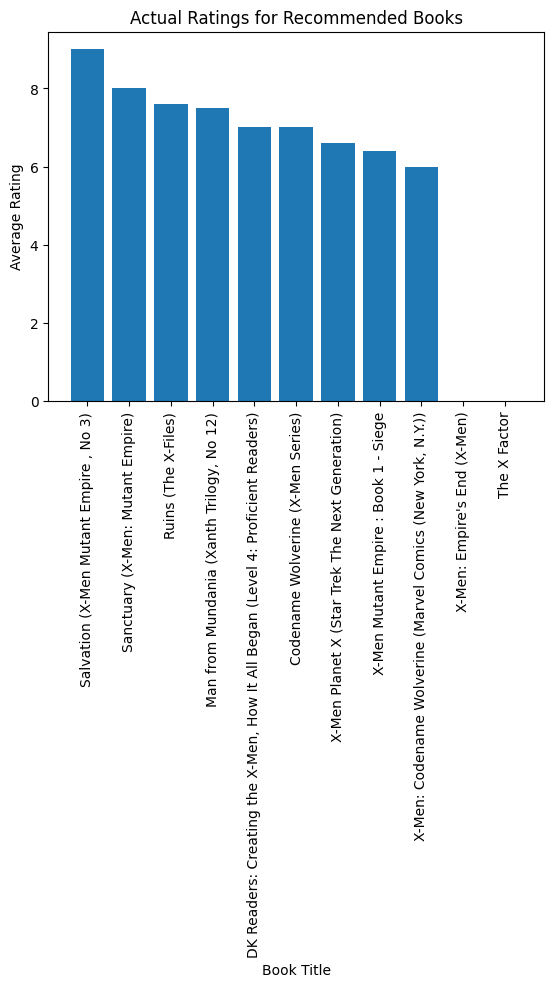

In [ ]:
visualization(actual_rate3)

In [ ]:
#combine bert_one-hot
from zmq import OUT_BATCH_SIZE
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

columns=input_book.select_dtypes(include='object').columns.drop(['book_title','summary'])
for column in columns:
  input_book[column]=input_book[column].astype('category')
  input_book['new_'+column]=input_book[column].cat.codes

encoder=OneHotEncoder()
encoded_data=pd.DataFrame(encoder.fit_transform(input_book[['new_book_author','new_publisher','new_language','new_category']]).toarray())
cosine_sim_one_hot=cosine_similarity(encoded_data)
bert_one_hot_sim =cosine_sim_one_hot + cs_summary
bert_one_hot_sim /= np.linalg.norm(bert_one_hot_sim, axis=1, keepdims=True)


def get_recommendations(book_title,cosine_sim=bert_one_hot_sim):
  indices = pd.Series(input_book.index,index=input_book['book_title']).drop_duplicates()

  idx=indices[book_title]
  similarity_scores=sorted(list(enumerate(cosine_sim[idx])),key=lambda x: x[1],reverse=True)
  similarity_scores =  similarity_scores[0:11]
  book_indices=[i[0]for i in similarity_scores]

  return input_book[['book_title','category']].iloc[book_indices]


recommend_list4=get_recommendations('Death in the Clouds')
recommend_list4



,book_title,category
381185,Sanctuary (X-Men: Mutant Empire),Fiction
381178,X-Men Mutant Empire : Book 1 - Siege,Fiction
428263,Codename Wolverine (X-Men Series),Fiction
575148,Daredevil: Predator's Smile,Fiction
381189,"Salvation (X-Men Mutant Empire , No 3)",Adventure stories
532016,"X-Men: Codename Wolverine (Marvel Comics (New York, N.Y.))",Fiction
380921,X-Men: Empire's End (X-Men),Fiction
507891,Spider-Man: Emerald Mystery (Spider-Man (Boulevard Books)),Fiction
589442,The Incredible Hulk: What Savage Beast,Fiction
46309,The Bad Place,Fiction


In [ ]:
actual_rate4=recommend_actual_rate(recommend_list4).sort_values(by=['ave_rate'],ascending=False)
actual_rate4

,book_title,ave_rate
5036,Spider-Man: The Lizard Sanction (Spider-Man (Boulevard Books)),10.0
3872,"Salvation (X-Men Mutant Empire , No 3)",9.0
3871,Sanctuary (X-Men: Mutant Empire),8.0
9493,Daredevil: Predator's Smile,8.0
133,The Bad Place,7.8
4884,Codename Wolverine (X-Men Series),7.0
3870,X-Men Mutant Empire : Book 1 - Siege,6.4
7729,"X-Men: Codename Wolverine (Marvel Comics (New York, N.Y.))",6.0
10085,The Incredible Hulk: What Savage Beast,5.0
3852,X-Men: Empire's End (X-Men),NaN


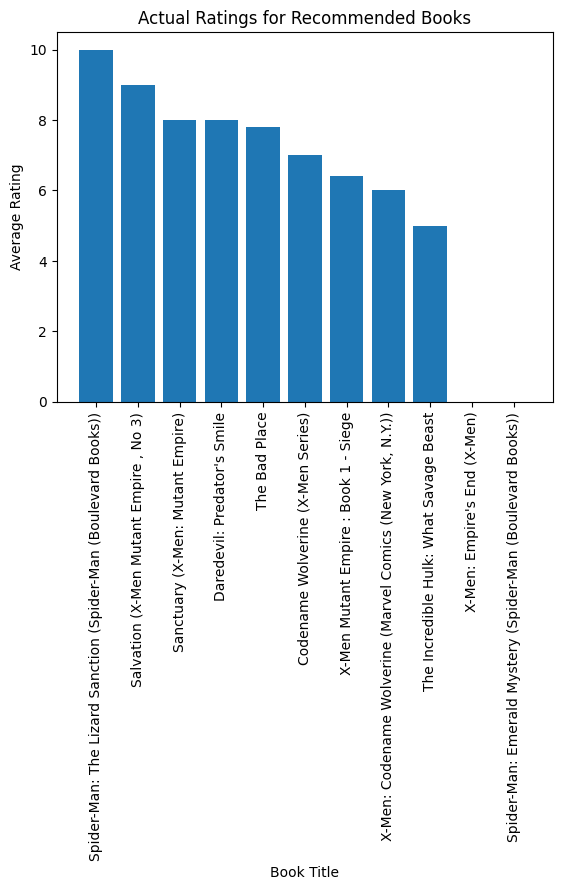

In [ ]:
visualization(actual_rate4)

In [ ]:
import numpy as np
#combined_embeddings=np.concatenate((summary_embeddings,title_embeddings),axis=1)
cosine_sim_combined = cs_summary + cs_title
# normalize the combined similarity matrix to obtain a new similarity matrix
cosine_sim_combined /= np.linalg.norm(cosine_sim_combined, axis=1, keepdims=True)
def get_recommendations(book_title,cosine_sim=cosine_sim_combined ):
  indices = pd.Series(input_book.index,index=input_book['book_title']).drop_duplicates()
  idx=indices[book_title]
  similarity_scores=sorted(list(enumerate(cosine_sim[idx])),key=lambda x: x[1],reverse=True)
  similarity_scores =  similarity_scores[0:11]
  book_indices=[i[0]for i in similarity_scores]

  return input_book[['book_title','category']].iloc[book_indices]

recommend_list=get_recommendations('Death in the Clouds')
recommend_list
actual_rate=recommend_actual_rate(recommend_list).sort_values(by=['ave_rate'],ascending=False)
actual_rate

NameError: ignored

In [ ]:
def get_recommendations(book_title,cosine_sim=bert_one_hot_sim):
  indices = pd.Series(input_book.index,index=input_book['book_title']).drop_duplicates()

  idx=indices[book_title]
  similarity_scores=sorted(list(enumerate(cosine_sim[idx])),key=lambda x: x[1],reverse=True)
  similarity_scores =  similarity_scores[0:11]
  book_indices=[i[0]for i in similarity_scores]

  return input_book[['book_title','category']].iloc[book_indices]
recommend_list=get_recommendations('Death in the Clouds')
#recommend_list=get_recommendations('Death in the Clouds')
#recommend_books=recommend_list['book_title']
#recommend_books

NameError: ignored

In [ ]:
def recommend_actual_rate(recommend_list1):
#recommend_books=get_recommendations('Death in the Clouds')['book_title']
  return book_averate[(book_averate['book_title'].isin(get_recommendations('Death in the Clouds')['book_title']))]
actual_rate1=recommend_actual_rate(recommend_list).sort_values(by=['ave_rate'],ascending=False)
actual_rate1

,book_title,ave_rate
3872,"Salvation (X-Men Mutant Empire , No 3)",9.0
616,Sanctuary,8.2
3871,Sanctuary (X-Men: Mutant Empire),8.0
4884,Codename Wolverine (X-Men Series),7.0
1628,X-Men Planet X (Star Trek The Next Generation),6.6
3870,X-Men Mutant Empire : Book 1 - Siege,6.4
7729,"X-Men: Codename Wolverine (Marvel Comics (New York, N.Y.))",6.0
6309,The Mutant Season,5.5
3586,GAME OF EMPIRE,NaN
3852,X-Men: Empire's End (X-Men),NaN


In [ ]:
def get_recommendations(book_title,cosine_sim=cosine_sim_one_hot):
  indices = pd.Series(input_book.index,index=input_book['book_title']).drop_duplicates()
  idx=indices[book_title]
  similarity_scores=sorted(list(enumerate(cosine_sim[idx])),key=lambda x: x[1],reverse=True)
  similarity_scores =  similarity_scores[0:11]
  book_indices=[i[0]for i in similarity_scores]

  return input_book[['book_title','category']].iloc[book_indices]

recommend_list3=get_recommendations('Death in the Clouds')
recommend_list3


,book_title,category
381178,X-Men Mutant Empire : Book 1 - Siege,Fiction
381185,Sanctuary (X-Men: Mutant Empire),Fiction
428263,Codename Wolverine (X-Men Series),Fiction
575148,Daredevil: Predator's Smile,Fiction
3781,Death in the Clouds,Fiction
8521,The Sum of All Fears,Fiction
35423,The Crying Child,Fiction
41331,Big Trouble,Fiction
46309,The Bad Place,Fiction
46441,The Key to Midnight,Fiction


In [ ]:
def recommend_actual_rate(recommend_list3):
#recommend_books=get_recommendations('Death in the Clouds')['book_title']
  return book_averate[(book_averate['book_title'].isin(get_recommendations('Death in the Clouds')['book_title']))]
actual_rate3=recommend_actual_rate(recommend_list).sort_values(by=['ave_rate'],ascending=False)
actual_rate3

,book_title,ave_rate
5036,Spider-Man: The Lizard Sanction (Spider-Man (Boulevard Books)),10.0
3872,"Salvation (X-Men Mutant Empire , No 3)",9.0
3871,Sanctuary (X-Men: Mutant Empire),8.0
9493,Daredevil: Predator's Smile,8.0
133,The Bad Place,7.8
4884,Codename Wolverine (X-Men Series),7.0
3870,X-Men Mutant Empire : Book 1 - Siege,6.4
7729,"X-Men: Codename Wolverine (Marvel Comics (New York, N.Y.))",6.0
10085,The Incredible Hulk: What Savage Beast,5.0
3852,X-Men: Empire's End (X-Men),NaN


In [ ]:
def get_recommendations(book_title,cosine_sim=bert_one_hot_sim):
  indices = pd.Series(input_book.index,index=input_book['book_title']).drop_duplicates()
  idx=indices[book_title]
  similarity_scores=sorted(list(enumerate(cosine_sim[idx])),key=lambda x: x[1],reverse=True)
  similarity_scores =  similarity_scores[0:11]
  book_indices=[i[0]for i in similarity_scores]

  return input_book[['book_title','category']].iloc[book_indices]

recommend_list4=get_recommendations('Death in the Clouds')
recommend_list4

,book_title,category
381185,Sanctuary (X-Men: Mutant Empire),Fiction
381178,X-Men Mutant Empire : Book 1 - Siege,Fiction
428263,Codename Wolverine (X-Men Series),Fiction
575148,Daredevil: Predator's Smile,Fiction
381189,"Salvation (X-Men Mutant Empire , No 3)",Adventure stories
532016,"X-Men: Codename Wolverine (Marvel Comics (New York, N.Y.))",Fiction
380921,X-Men: Empire's End (X-Men),Fiction
507891,Spider-Man: Emerald Mystery (Spider-Man (Boulevard Books)),Fiction
589442,The Incredible Hulk: What Savage Beast,Fiction
46309,The Bad Place,Fiction


In [ ]:
def recommend_actual_rate(recommend_list4):
#recommend_books=get_recommendations('Death in the Clouds')['book_title']
  return book_averate[(book_averate['book_title'].isin(get_recommendations('Death in the Clouds')['book_title']))]
actual_rate4=recommend_actual_rate(recommend_list).sort_values(by=['ave_rate'],ascending=False)
actual_rate4

,book_title,ave_rate
5036,Spider-Man: The Lizard Sanction (Spider-Man (Boulevard Books)),10.0
3872,"Salvation (X-Men Mutant Empire , No 3)",9.0
3871,Sanctuary (X-Men: Mutant Empire),8.0
9493,Daredevil: Predator's Smile,8.0
133,The Bad Place,7.8
4884,Codename Wolverine (X-Men Series),7.0
3870,X-Men Mutant Empire : Book 1 - Siege,6.4
7729,"X-Men: Codename Wolverine (Marvel Comics (New York, N.Y.))",6.0
10085,The Incredible Hulk: What Savage Beast,5.0
3852,X-Men: Empire's End (X-Men),NaN


In [ ]:
sns.set_context('paper')
plt.figure(figsize=(10,10))
ax = data.groupby('language')['book_title'].count().plot.bar()
plt.title('Language')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

In [ ]:
from zmq import OUT_BATCH_SIZE
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
#output = df_cat[(df_cat['category'].isin(valid_categories)) & (df_cat['book_author'].isin(valid_authors)) & (df_cat['publisher'].isin(valid_publishers))]
#output.info()
#count_cat=len(output['category'].unique())
#count_author=len(output['book_author'].unique())
#count_publisher=len(output['publisher'].unique())
#display(count_author,count_cat,count_publisher,)

columns=input_book.select_dtypes(include='object').columns.drop(['book_title','summary'])
for column in columns:
  input_book[column]=input_book[column].astype('category')
  input_book['new_'+column]=input_book[column].cat.codes
#output.info()
#output.head()

encoder=OneHotEncoder()
encoded_data=pd.DataFrame(encoder.fit_transform(input_book[['new_book_author','new_publisher','new_language','new_category']]).toarray())
#encoded_data.info()
#encoded_data.head()
#data plus the encode_data
#new_df=output.join(encoded_data)
#new_df.info()
#new_df.head()

cosine_sim_one_hot=cosine_similarity(encoded_data)

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')
plt.figure(figsize=(100,100))
books = data['language'].value_counts()[:20]

sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring language")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

In [ ]:
#remove the leading or trailing white space in book_title
data['book_title'] = data['book_title'].apply(lambda x: x.strip())
data=data.drop("Unnamed: 0", axis=1)

data.info()
data.head(10)
#data.head(20000)


In [ ]:
def title(index):
  return data[data.index==index]["book_title"].values[0]

def index(book_title):
  return data[data.book_title==book_title]["index"].values[0]

In [ ]:
indices = pd.Series(data.index,index=data['book_title']).drop_duplicates()
indices.head()

book_title
Mary-Kate & Ashley Switching Goals (Mary-Kate and Ashley Starring in)    0
Death in the Clouds                                                      1
I'll Be Seeing You                                                       2
Left Behind: A Novel of the Earth's Last Days (Left Behind #1)           3
Heart of Darkness (Wordsworth Collection)                                4
dtype: int64

In [ ]:
def get_user(book_title):
  return input_rate[input_rate['book_title']==book_title][['user_id','rating']]


In [ ]:
#one-hot+bert(summary)
import numpy as np
#combined_embeddings=np.concatenate((summary_embeddings,title_embeddings),axis=1)
bert_one_hot_sim =cosine_sim_one_hot + cs_summary

# normalize the combined similarity matrix to obtain a new similarity matrix
bert_one_hot_sim /= np.linalg.norm(bert_one_hot_sim, axis=1, keepdims=True)


In [ ]:
title='Death in the Clouds'
users=input_rate[(input_rate['book_title']==title) & (input_rate['rating']>5)][['user_id','book_title','category','rating']].sort_values(by=['rating'],ascending=False)
users


,user_id,book_title,category,rating
3785,43246,Death in the Clouds,Fiction,10
3790,138543,Death in the Clouds,Fiction,10
3788,125774,Death in the Clouds,Fiction,9
3783,11676,Death in the Clouds,Fiction,8
3786,88412,Death in the Clouds,Fiction,8
3781,17,Death in the Clouds,Fiction,7
